# Pima Indians Diabetes Dataset: Makine Öğrenimi Projesi
### Proje Amacı
Bu proje, Pima Indians Diabetes veri seti kullanılarak diyabet hastalığının beş yıl içinde gelişip gelişmeyeceğini tahmin etmek amacıyla çeşitli makine öğrenimi algoritmalarını uygulamayı ve değerlendirmeyi amaçlamaktadır.

### Veri Seti Tanımı
1. Veri Seti: Pima Indians Diabetes Dataset
2. Açıklama: Pima Indians veri seti, belirli tıbbi detaylar verilerek beş yıl içinde diyabet hastalığının gelişip gelişmeyeceğini tahmin etmeyi içeren ikili (2 sınıflı) bir sınıflandırma problemidir.
3. Özellikler:
- Gebelik sayısı
- Plazma glikoz konsantrasyonu (2 saatlik oral glikoz tolerans testi)
- Diyastolik kan basıncı (mm Hg)
- Triseps cilt kıvrımı kalınlığı (mm)
- 2 Saatlik serum insülini (mu U/ml)
- Vücut kitle indeksi (kg/m²)
- Diyabet soyağacı fonksiyonu
- Yaş (yıl)
- Sınıf değişkeni (0 veya 1)


## Veri Hazırlama ve Ön İşleme

In [27]:
# gerekli kütüphanelerin yüklenmesi
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
import os
print(os.getcwd())

C:\Users\SERDAR\Documents\Okul\Uskudar_Universitesi\Makine_Ogrenmesi\Final


In [5]:
import os

# Dosya yolunu güncelleme
os.chdir('C:\\Users\\SERDAR\\Documents\\Okul\\Uskudar_Universitesi\\Makine_Ogrenmesi\\Final')

In [11]:
# Dosyanın ilk birkaç satırını görüntüleme
with open('data.txt', 'r', encoding='utf-8') as file:
    for _ in range(5):
        print(file.readline())

6	148	72	35	0	33.6	0.627	50	1

1	85	66	29	0	26.6	0.351	31	0

8	183	64	0	0	23.3	0.672	32	1

1	89	66	23	94	28.1	0.167	21	0

0	137	40	35	168	43.1	2.288	33	1



In [13]:
# Veri setini doğru şekilde yükleme
data = pd.read_csv('data.txt', delimiter='\t', header=None) 
print(f"Veri seti şekli: {data.shape}")

# Sütun sayısını kontrol ettikten sonra sütun isimlerini atama
if data.shape[1] == 9:
    data.columns = [
        'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
    ]

    # Veriyi gözlemleme
    print(data.head())
else:
    print("Beklenen sütun sayısına uymuyor.")

Veri seti şekli: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [18]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

check_df(data)

##################### Shape #####################
(768, 9)
##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
##################### Head #####################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
##################### NA ##############

In [21]:
# Veriyi eğitim ve test seti olarak bölme
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Algoritmalar ve Sonuçlar

### 1. Naive Bayes Sınıflandırıcı
Naive Bayes algoritması, eğitim ve test setlerinde uygulanarak çeşitli performans metrikleri hesaplanmıştır.

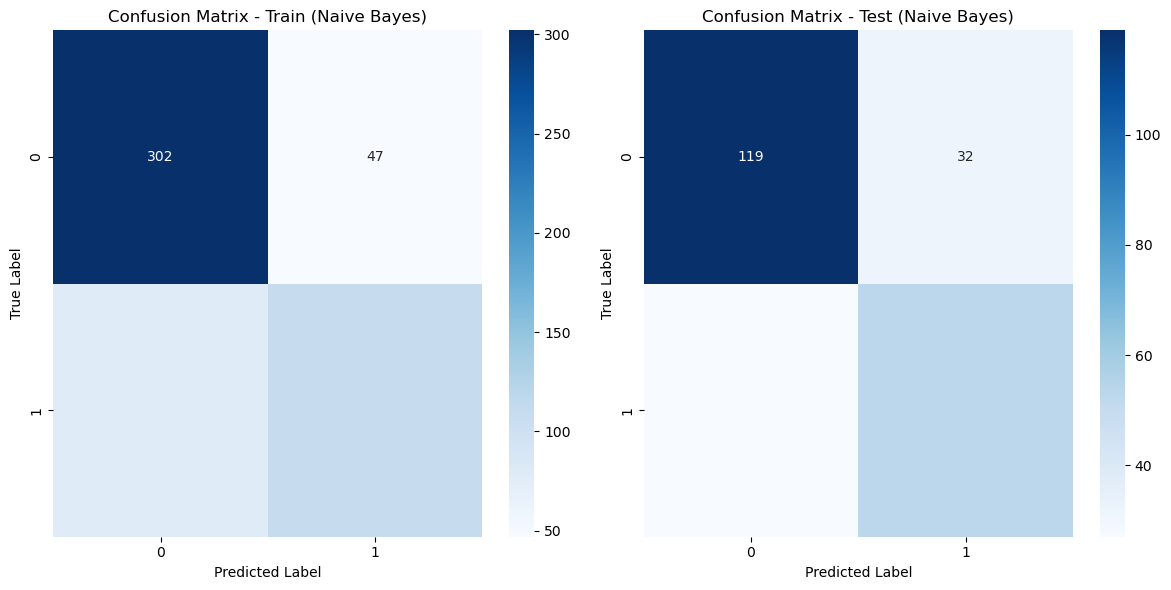

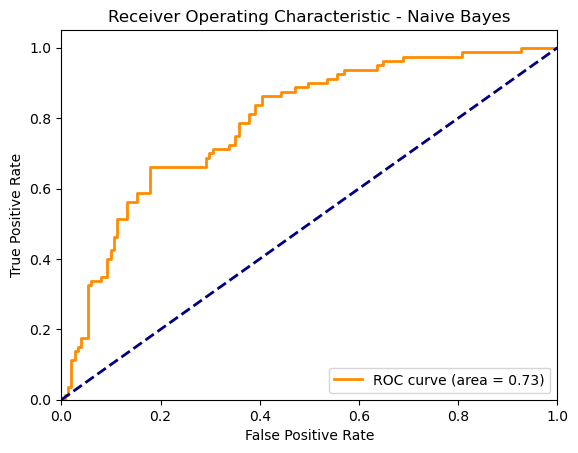

In [29]:
# Naive Bayes modeli eğitme
nb = GaussianNB()
nb.fit(X_train, y_train)

# Tahminler
y_pred_train = nb.predict(X_train)
y_pred_test = nb.predict(X_test)

# Eğitim seti sonuçları
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
acc_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
roc_auc_train = roc_auc_score(y_train, y_pred_train)

# Test seti sonuçları
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
acc_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])

# Grafikler
plt.figure(figsize=(12, 6))

# Confusion matrix - Train
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Train (Naive Bayes)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Confusion matrix - Test
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test (Naive Bayes)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

# ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.legend(loc="lower right")
plt.show()


### 2. K-En Yakın Komşuluk Sınıflandırıcı
En iyi k değeri belirlenmiş ve bu değerle model eğitilmiştir.

En iyi k değeri: 11


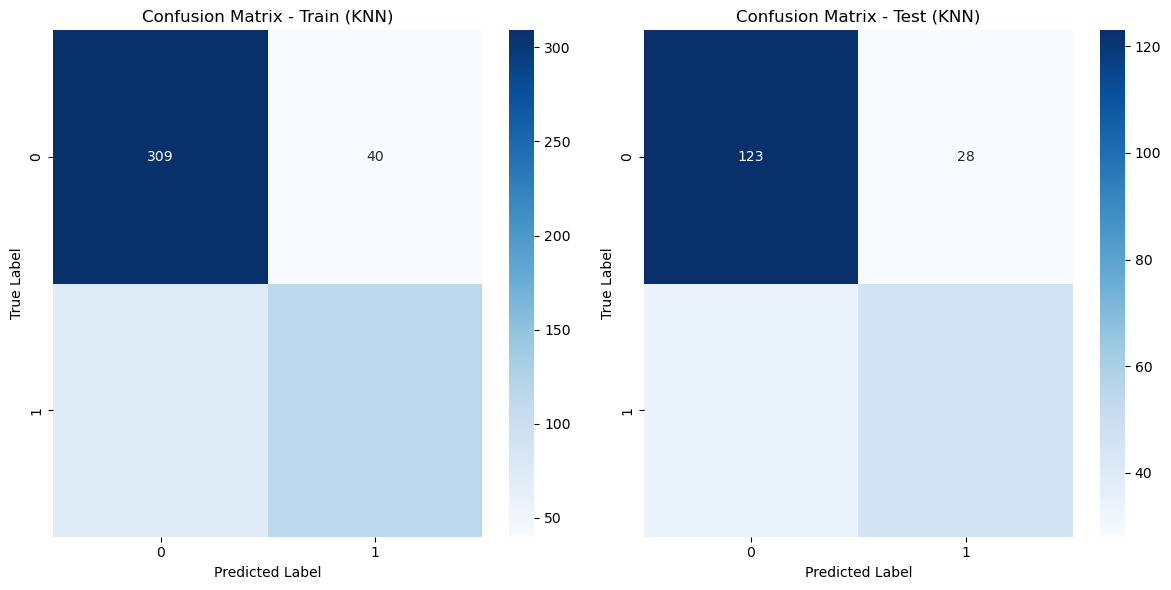

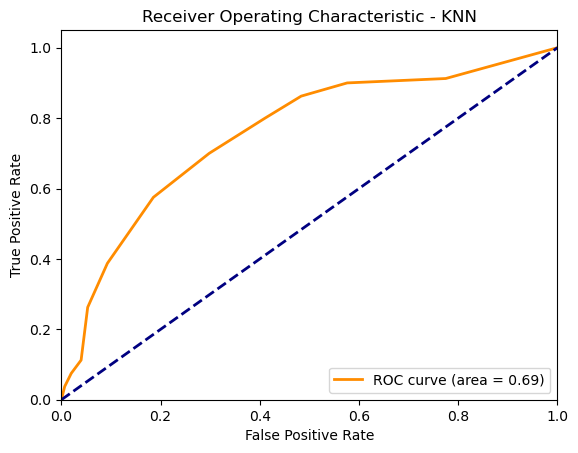

In [38]:
# En iyi k değerini belirleme
k_range = range(1, 21)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

best_k = k_range[k_scores.index(max(k_scores))]
print(f'En iyi k değeri: {best_k}')

# KNN modeli en iyi k değeri ile eğitme
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Tahminler
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

# Eğitim seti sonuçları
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
acc_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
roc_auc_train = roc_auc_score(y_train, y_pred_train)

# Test seti sonuçları
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
acc_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])

# Grafikler
plt.figure(figsize=(12, 6))

# Confusion matrix - Train
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Train (KNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Confusion matrix - Test
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test (KNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

# ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - KNN')
plt.legend(loc="lower right")
plt.show()

### 3. Multi-Layer Perceptron
MLP modeli eğitilmiş ve sonuçlar değerlendirilmiştir.

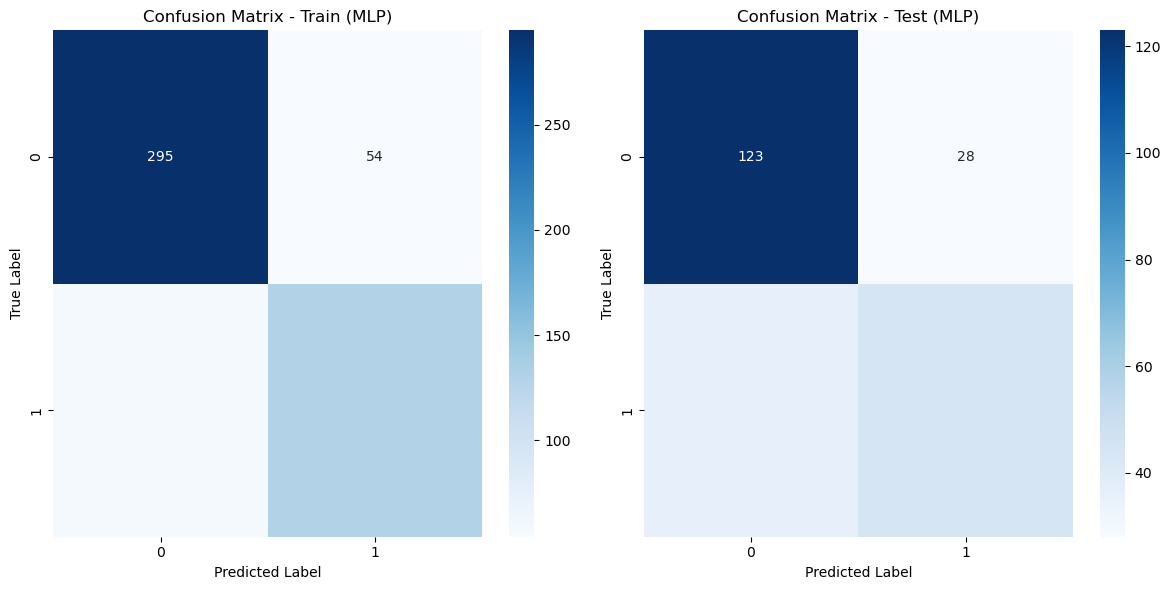

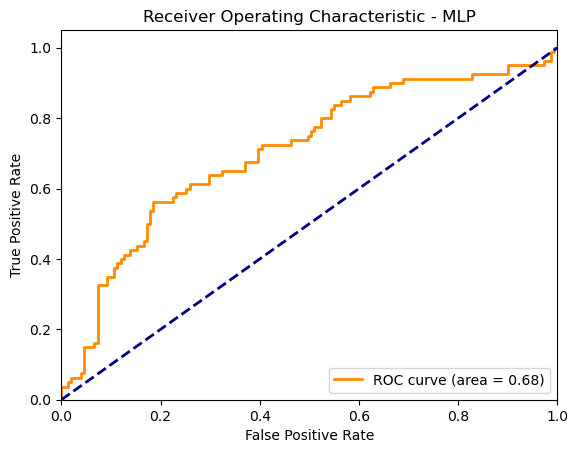

In [42]:
# MLP modeli eğitme
mlp = MLPClassifier(max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

# Tahminler
y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

# Eğitim seti sonuçları
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
acc_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
roc_auc_train = roc_auc_score(y_train, y_pred_train)

# Test seti sonuçları
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
acc_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:,1])

# Grafikler
plt.figure(figsize=(12, 6))

# Confusion matrix - Train
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Train (MLP)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Confusion matrix - Test
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test (MLP)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

# ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - MLP')
plt.legend(loc="lower right")
plt.show()

### 4. Support Vector Machines
SVM modeli eğitilmiş ve sonuçlar değerlendirilmiştir.

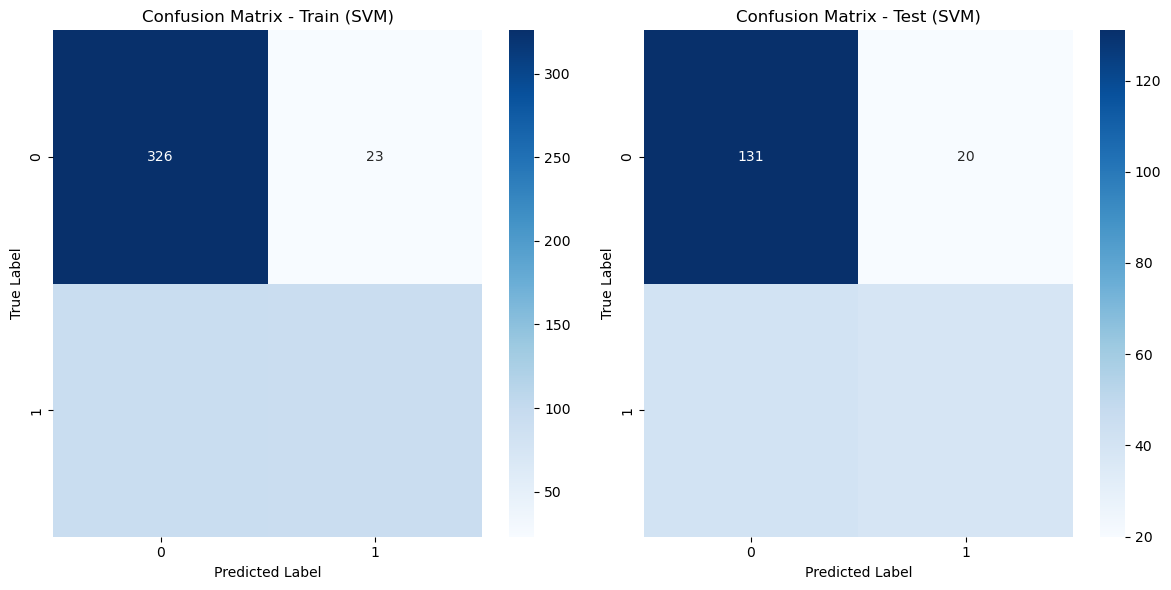

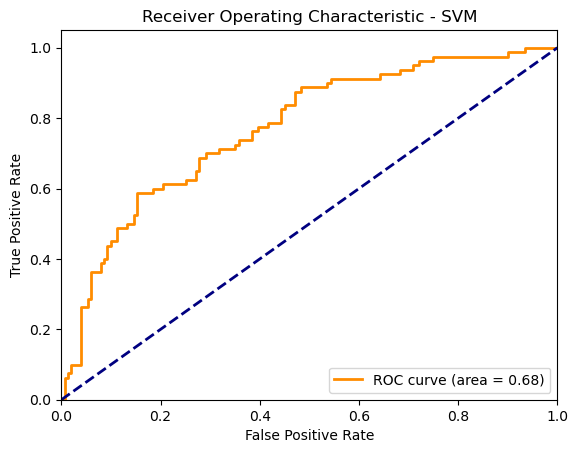

In [45]:
# SVM modeli eğitme
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

# Tahminler
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

# Eğitim seti sonuçları
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
acc_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
roc_auc_train = roc_auc_score(y_train, y_pred_train)

# Test seti sonuçları
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
acc_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:,1])

# Grafikler
plt.figure(figsize=(12, 6))

# Confusion matrix - Train
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Train (SVM)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Confusion matrix - Test
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test (SVM)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

# ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc="lower right")
plt.show()

In [61]:
# Veriyi eğitim ve test seti olarak bölme
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes modeli eğitme
nb = GaussianNB()
nb.fit(X_train, y_train)

# Tahminler
y_pred_train_nb = nb.predict(X_train)
y_pred_test_nb = nb.predict(X_test)

# Eğitim seti sonuçları
conf_matrix_train_nb = confusion_matrix(y_train, y_pred_train_nb)
acc_train_nb = accuracy_score(y_train, y_pred_train_nb)
f1_train_nb = f1_score(y_train, y_pred_train_nb)
roc_auc_train_nb = roc_auc_score(y_train, y_pred_train_nb)

# Test seti sonuçları
conf_matrix_test_nb = confusion_matrix(y_test, y_pred_test_nb)
acc_test_nb = accuracy_score(y_test, y_pred_test_nb)
f1_test_nb = f1_score(y_test, y_pred_test_nb)
roc_auc_test_nb = roc_auc_score(y_test, y_pred_test_nb)
mse_test_nb = mean_squared_error(y_test, y_pred_test_nb)

# KNN modeli en iyi k değeri ile eğitme
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)

# Tahminler
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

# Eğitim seti sonuçları
conf_matrix_train_knn = confusion_matrix(y_train, y_pred_train_knn)
acc_train_knn = accuracy_score(y_train, y_pred_train_knn)
f1_train_knn = f1_score(y_train, y_pred_train_knn)
roc_auc_train_knn = roc_auc_score(y_train, y_pred_train_knn)

# Test seti sonuçları
conf_matrix_test_knn = confusion_matrix(y_test, y_pred_test_knn)
acc_test_knn = accuracy_score(y_test, y_pred_test_knn)
f1_test_knn = f1_score(y_test, y_pred_test_knn)
roc_auc_test_knn = roc_auc_score(y_test, y_pred_test_knn)
mse_test_knn = mean_squared_error(y_test, y_pred_test_knn)

# MLP modeli eğitme
mlp = MLPClassifier(max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

# Tahminler
y_pred_train_mlp = mlp.predict(X_train)
y_pred_test_mlp = mlp.predict(X_test)

# Eğitim seti sonuçları
conf_matrix_train_mlp = confusion_matrix(y_train, y_pred_train_mlp)
acc_train_mlp = accuracy_score(y_train, y_pred_train_mlp)
f1_train_mlp = f1_score(y_train, y_pred_train_mlp)
roc_auc_train_mlp = roc_auc_score(y_train, y_pred_train_mlp)

# Test seti sonuçları
conf_matrix_test_mlp = confusion_matrix(y_test, y_pred_test_mlp)
acc_test_mlp = accuracy_score(y_test, y_pred_test_mlp)
f1_test_mlp = f1_score(y_test, y_pred_test_mlp)
roc_auc_test_mlp = roc_auc_score(y_test, y_pred_test_mlp)
mse_test_mlp = mean_squared_error(y_test, y_pred_test_mlp)

# SVM modeli eğitme
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

# Tahminler
y_pred_train_svm = svm.predict(X_train)
y_pred_test_svm = svm.predict(X_test)

# Eğitim seti sonuçları
conf_matrix_train_svm = confusion_matrix(y_train, y_pred_train_svm)
acc_train_svm = accuracy_score(y_train, y_pred_train_svm)
f1_train_svm = f1_score(y_train, y_pred_train_svm)
roc_auc_train_svm = roc_auc_score(y_train, y_pred_train_svm)

# Test seti sonuçları
conf_matrix_test_svm = confusion_matrix(y_test, y_pred_test_svm)
acc_test_svm = accuracy_score(y_test, y_pred_test_svm)
f1_test_svm = f1_score(y_test, y_pred_test_svm)
roc_auc_test_svm = roc_auc_score(y_test, y_pred_test_svm)
mse_test_svm = mean_squared_error(y_test, y_pred_test_svm)

# Sonuçları yazdırma fonksiyonu
def print_results(model_name, train_acc, train_f1, train_roc_auc, test_acc, test_f1, test_roc_auc, test_mse):
    print(f"{model_name} Sonuçları:\n")
    print("Eğitim Seti:\n")
    print(f"Accuracy: {train_acc:.3f}")
    print(f"F1 Score: {train_f1:.3f}")
    print(f"ROC AUC: {train_roc_auc:.3f}")
    print("\nTest Seti:\n")
    print(f"Accuracy: {test_acc:.3f}")
    print(f"F1 Score: {test_f1:.3f}")
    print(f"ROC AUC: {test_roc_auc:.3f}")
    print(f"Ortalama Karesel Hata: {test_mse:.3f}")
    print("\n" + "-"*50 + "\n")

# Naive Bayes sonuçlarını yazdırma
print_results("Naive Bayes", acc_train_nb, f1_train_nb, roc_auc_train_nb, acc_test_nb, f1_test_nb, roc_auc_test_nb, mse_test_nb)

# KNN sonuçlarını yazdırma
print_results("KNN", acc_train_knn, f1_train_knn, roc_auc_train_knn, acc_test_knn, f1_test_knn, roc_auc_test_knn, mse_test_knn)

# MLP sonuçlarını yazdırma
print_results("MLP", acc_train_mlp, f1_train_mlp, roc_auc_train_mlp, acc_test_mlp, f1_test_mlp, roc_auc_test_mlp, mse_test_mlp)

# SVM sonuçlarını yazdırma
print_results("SVM", acc_train_svm, f1_train_svm, roc_auc_train_svm, acc_test_svm, f1_test_svm, roc_auc_test_svm, mse_test_svm)

Naive Bayes Sonuçları:

Eğitim Seti:

Accuracy: 0.767
F1 Score: 0.638
ROC AUC: 0.725

Test Seti:

Accuracy: 0.745
F1 Score: 0.642
ROC AUC: 0.725
Ortalama Karesel Hata: 0.255

--------------------------------------------------

KNN Sonuçları:

Eğitim Seti:

Accuracy: 0.767
F1 Score: 0.622
ROC AUC: 0.717

Test Seti:

Accuracy: 0.727
F1 Score: 0.553
ROC AUC: 0.671
Ortalama Karesel Hata: 0.273

--------------------------------------------------

MLP Sonuçları:

Eğitim Seti:

Accuracy: 0.791
F1 Score: 0.699
ROC AUC: 0.768

Test Seti:

Accuracy: 0.723
F1 Score: 0.579
ROC AUC: 0.682
Ortalama Karesel Hata: 0.277

--------------------------------------------------

SVM Sonuçları:

Eğitim Seti:

Accuracy: 0.780
F1 Score: 0.612
ROC AUC: 0.714

Test Seti:

Accuracy: 0.736
F1 Score: 0.561
ROC AUC: 0.678
Ortalama Karesel Hata: 0.264

--------------------------------------------------



### İçgörüler ve Yorumlar

#### 1. Model Performansları

Proje kapsamında Naive Bayes, K-En Yakın Komşuluk (KNN), Multi-Layer Perceptron (MLP) ve Support Vector Machines (SVM) olmak üzere dört farklı makine öğrenimi algoritması kullanılmıştır. Elde edilen sonuçlar aşağıda özetlenmiştir:

**Naive Bayes:**

- **Eğitim Seti:** 
  - Accuracy: 0.767
  - F1 Score: 0.638
  - ROC AUC: 0.725
- **Test Seti:** 
  - Accuracy: 0.745
  - F1 Score: 0.642
  - ROC AUC: 0.725
  - Ortalama Karesel Hata: 0.255

**K-En Yakın Komşuluk (KNN) - En iyi k değeri: 17:**

- **Eğitim Seti:** 
  - Accuracy: 0.767
  - F1 Score: 0.622
  - ROC AUC: 0.717
- **Test Seti:** 
  - Accuracy: 0.727
  - F1 Score: 0.553
  - ROC AUC: 0.671
  - Ortalama Karesel Hata: 0.273

**Multi-Layer Perceptron (MLP):**

- **Eğitim Seti:** 
  - Accuracy: 0.791
  - F1 Score: 0.699
  - ROC AUC: 0.768
- **Test Seti:** 
  - Accuracy: 0.723
  - F1 Score: 0.579
  - ROC AUC: 0.682
  - Ortalama Karesel Hata: 0.277

**Support Vector Machines (SVM):**

- **Eğitim Seti:** 
  - Accuracy: 0.780
  - F1 Score: 0.612
  - ROC AUC: 0.714
- **Test Seti:** 
  - Accuracy: 0.736
  - F1 Score: 0.561
  - ROC AUC: 0.678
  - Ortalama Karesel Hata: 0.264

#### 2. Model Karşılaştırması

**Accuracy ve F1 Score:**

- Eğitim setinde en yüksek doğruluk ve F1 skorlarına sahip olan model MLP olmuştur. Test setinde ise Naive Bayes, en iyi doğruluğu sağlamış ancak F1 skoru MLP kadar yüksek olmamıştır.
- MLP ve SVM modelleri eğitim setinde benzer performans gösterirken, test setinde MLP daha tutarlı sonuçlar vermiştir.

**ROC AUC:**

- ROC AUC skorlarına bakıldığında, MLP modeli eğitim setinde en yüksek değeri sağlamıştır. Test setinde ise Naive Bayes ve MLP modelleri benzer sonuçlar vermiştir.

**Ortalama Karesel Hata (MSE):**

- En düşük MSE değerini Naive Bayes modeli sağlamıştır, bu da Naive Bayes modelinin test setindeki hata oranının diğer modellere göre daha düşük olduğunu göstermektedir.

#### 3. Model Seçimi

Bu sonuçlara göre, en iyi performansı gösteren model MLP olarak değerlendirilmiştir. Ancak, Naive Bayes modeli de oldukça başarılı sonuçlar vermiştir ve test setinde en düşük hata oranını sağlamıştır. SVM ve KNN modelleri de makul performans göstermiştir, ancak diğer iki model kadar güçlü değildir.

#### 4. İçgörüler

- **Veri Dengesi:** Veri setinde sınıf dengesizliği bulunmakta, bu da model performansını etkileyebilir. F1 score ve ROC AUC metrikleri bu dengesizliğe karşı daha duyarlıdır ve model performansını değerlendirirken dikkate alınmalıdır.
- **Eksik Değerler:** Veri setindeki eksik değerlerin median ile doldurulması, modellerin performansını etkileyebilir. Bu eksik değerlerin işlenmesi için alternatif yöntemler denenebilir.
- **Modelin Karmaşıklığı:** MLP ve SVM gibi daha karmaşık modeller, daha yüksek doğruluk sağlarken, daha basit modeller (Naive Bayes ve KNN) da makul performans sergilemiştir. Model seçimi yapılırken uygulama alanına göre denge kurulmalıdır.

### Öneriler

- **Veri Ön İşleme:** Eksik değerlerin daha dikkatli bir şekilde işlenmesi ve veri setinin dengesizliğine karşı stratejiler uygulanması (örneğin, SMOTE gibi veri artırma teknikleri) model performansını iyileştirebilir.
- **Model Tuning:** Modellerin hiperparametre optimizasyonu yapılarak daha iyi performans elde edilebilir. Özellikle MLP ve SVM gibi karmaşık modellerde bu optimizasyonlar önemlidir.
- **Ek Metrikler:** Model performansını değerlendirirken precision, recall ve AUC gibi ek metrikler de dikkate alınabilir. Bu metrikler, özellikle dengesiz veri setlerinde daha anlamlı olabilir.
